In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
from scipy.integrate import solve_ivp

In [9]:
class Kuramoto:
    def __init__(self, theta0, T,N, M=1,sigma=0.43,eta=0.04):
        self.N = N
        self.M = M
        self.T = T
        self.sigma = sigma
        self.eta = eta
        self.theta = np.zeros([N,M])
        self.example = np.zeros([N,M])
        self.v = np.zeros([N,M])
        #self.theta[0] = theta0
        self.omegas = np.random.normal(0,sigma,[N,M])

        
    def K_phi(self,phi):
        return np.sin(phi) + self.eta*(1 - np.cos(phi))
    
    def RHS(self,t,theta):
        #print(f'theta is {theta}')
        #omegas = np.random.normal(0,sigma,self.N)

        psi_0 = np.roll(theta,-1)
        psi_1 = theta
        psi_2 = np.roll(theta,1)
        a1 = self.K_phi(psi_2 - psi_1)
        a2 = self.K_phi(psi_0 - psi_1)
        y = (a1 + a2 + self.omegas)
        # fixed boundary conditions
        y[0] = 0
        y[-1] = 0
        return  y
    
    def twod_rhs():
        j_plus = np.roll(theta,1,axis=1)
        j_minus = np.roll(theta,-1,axis=1)
        i_plus = np.roll(theta,1,axis=0)
        i_minus = np.roll(theta,-1,axis=0)
        a1 = self.K_phi(j_plus - theta)
        a2 = self.K_phi(j_minus - theta)
        a3 = self.K_phi(i_plus - theta)
        a4 = self.K_phi(i_minus - theta)
        y = a1 + a2+ a3+a4 + self.omegas
        y[0,:] = 0
        y[:,0] = 0
        y[-1,:] = 0
        y[:,-1] = 0
        return y
    
    def solve(self):
        sol = solve_ivp(self.RHS,[0,self.T],self.theta,method='LSODA')
        
        self.theta = sol.y
        return
    
        
    def diff(self):
        self.example = np.transpose(self.theta)[-2] - np.pi
        sign = np.sign(self.example - np.roll(self.example,-1))
        self.diffs = abs(( self.example - np.roll(self.example,-1)))%(2*np.pi)
        for i in range(N-1):
            self.example[i:] = self.example[i:] + sign[i+1] * self.diffs[i+1]
            
    def pick(self,t):
        return np.transpose(eg.theta)[t] % (2*np.pi)
            
    def omega(self,t):
        theta = self.pick(t)
        shift(theta)
        for i in range(len(self.v)):
            self.v[i] =  self.eta/ self.N *(np.sum(1 - np.cos(np.roll(theta,1) -theta)+ 1 - np.cos(np.roll(theta,-1) -theta)))
            self.v[i] += np.mean(self.omegas)
            self.v[i] += theta[i]
        return
    

    
    

In [ ]:
theta = np.zeros(120,150)
def twod_rhs():
    j_plus = np.roll(theta,1,axis=1)
    j_minus = np.roll(theta,-1,axis=1)
    i_plus = np.roll(theta,1,axis=0)
    i_minus = np.roll(theta,-1,axis=0)
    a1 = self.K_phi(j_plus - theta)
    a2 = self.K_phi(j_minus - theta)
    a3 = self.K_phi(i_plus - theta)
    a4 = self.K_phi(i_minus - theta)
    y = a1 + a2+ a3+a4 + self.omegas
    

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [3]:
def shift(phases, tol=1):
    z = np.exp(phases*1j)
    diff_z = np.abs(z[1:]-z[:-1])
    diff_ang = phases[1:]-phases[:-1]
    for (i, (dz, dtheta)) in enumerate(zip(diff_z, diff_ang)): 
        if np.abs(dtheta) - dz > tol:  
            if dtheta < 0:
                phases[i+1:] += np.pi*2
            else: 
                phases[i+1:] -= np.pi*2

In [4]:
eg = Kuramoto(0,120,1000)
eg.RHS(eg.theta,1)
eg.solve()



In [5]:
phases = eg.pick(-2)
phases1 = eg.pick(-2)
phases2 = eg.pick(-2)
shift(phases)

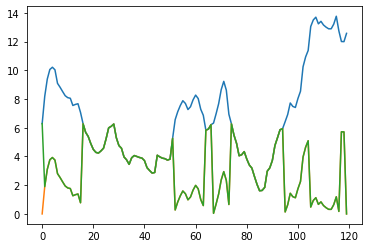

In [6]:
plt.plot(phases)
plt.plot(phases1 % (2*np.pi))
plt.plot(phases2)

In [8]:
phases1 - phases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [9]:
def sign(phases):
    return np.sign(phases[1:]-phases[:-1])

In [10]:
for i in range(1,len(phases1)-1):
    phases1[i:] = phases1[i:] + sign(phases1[(i-1):])[0] *2*np.pi

In [11]:
T = len(eg.theta)
vs = []
for i in range(T-1):
    vs.append(np.subtract(eg.theta[i+1], eg.theta[i]))
    

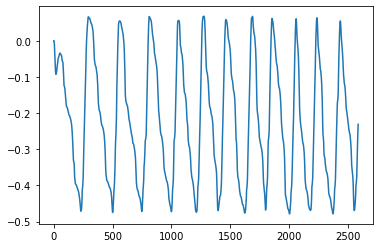

In [12]:
plt.plot(vs[-2])

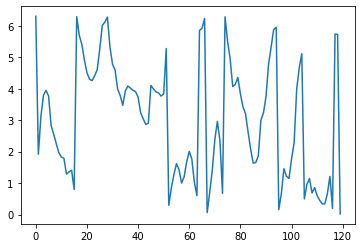

In [10]:
eg.omega(-2)
plt.plot(eg.v)

In [14]:
eg.what()

what


In [151]:
transpose = np.transpose(eg.theta)

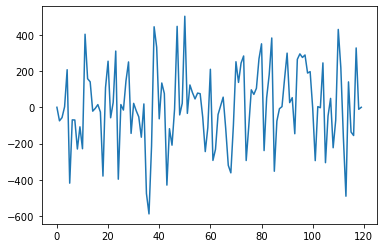

In [152]:
plt.plot(transpose[-2])


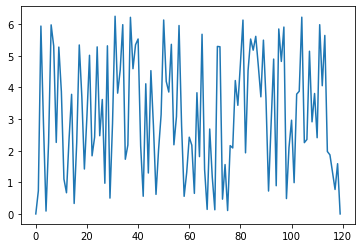

In [153]:
plt.plot(transpose[-2] % (2*np.pi))
plt.show()

In [ ]:
def force(self,psi_2,i=0):
        #omega = omegas[i]
        omega = np.random.normal(0,sigma,1)
        psi_0 = self.theta[i]
        psi_1 = self.theta[i+1]
        a1 = K_phi(psi_2 - psi_1)
        a2 = K_phi(psi_0 - psi_1)
        return  a1 + a2 + omega - omega_bar
    
    
    
    def analytical(self,i=0):
        A = np.cos(self.theta[i+1]) - eta * np.sin(self.theta[i+1])
        B = - np.sin(self.theta[i+1]) - eta*np.cos(self.theta[i+1])
        C = omega_bar - K_phi(self.theta[i] - self.theta[i+1]) - self.omegas[i] - eta
        answer = math.asin(C/(np.sqrt(A**2 +B**2))) - math.atan(B/A)
        return answer

    def find_phase_profile(self):
        for i in range(self.t - 1):
            self.theta[i+2] = fsolve(self.force,self.theta[i+1]+0.5,args=i)[0]
            #self.theta[i+2] = self.analytical(i)
            print('force: ' + str(self.force(self.theta[i+2],i)))
        return
    
    def find_dt_theta(self):
        for i in range(self.t-1):
            for j in range(self.t-1):
                psi_0 = self.theta[i]
                psi_1 = self.theta[i+1]
                psi_2 = self.theta[i+2]
                a1 = K_phi(psi_2 - psi_1)
                a2 = K_phi(psi_0 - psi_1)
                self.v[i] += a1 + a2
            self.v[i] += np.mean(self.omegas)
        return
    
    def find_phase_profile_2(self):
        for i in range(self.t):
            self.theta[i] = self.theta[i] % (2 * np.pi)
        return
    
    #continuum version
    def force_cont(self, x, v):
        v1 = - 1 * np.multiply(eta, v**2)
        y = np.add(v1, omega_bar)
        return y
    
    
    def RK2(self, Dt):
        for i in range(self.t):
            kx1 = self.v[i]
            kv1 = force(self.theta[i],self.v[i])

            kx2 = kx1 + np.multiply(Dt/2, kv1)
            kv2 = force(self.theta[i]+np.multiply(Dt/2,kx1),kx2)

            w = np.random.normal(0,sigma,1)
            self.theta[i+1] = self.theta[i] + np.multiply(Dt/2,(np.add(kx1, kx2)))
            self.v[i + 1] = self.v[i] + np.multiply(Dt/2, (np.add(kv1, kv2))) + np.multiply(w,np.sqrt(Dt))
        return